In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style for better aesthetics
sns.set(style="whitegrid")

In [2]:
# Load the dataset
df = pd.read_csv("/content/automobile_dataset.csv")

In [4]:
df.head()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2


In [5]:
df.describe()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,curb-weight,height,width,length,wheel-base,num-of-doors,normalized-losses,symboling
count,201.000000,205.000000,205.000000,203.000000,203.000000,205.000000,201.000000,201.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,203.000000,164.000000,205.000000
mean,13207.129353,30.751220,25.219512,5125.369458,104.256158,10.142537,3.255423,3.329751,126.907317,4.380488,2555.565854,53.724878,65.907805,174.049268,98.756585,3.123153,122.000000,0.834146
std,7947.066342,6.886443,6.542142,479.334560,39.714369,3.972040,0.316717,0.273539,41.642693,1.080854,520.680204,2.443522,2.145204,12.337289,6.021776,0.994841,35.442168,1.245307
min,5118.000000,16.000000,13.000000,4150.000000,48.000000,7.000000,2.070000,2.540000,61.000000,2.000000,1488.000000,47.800000,60.300000,141.100000,86.600000,2.000000,65.000000,-2.000000
25%,7775.000000,25.000000,19.000000,4800.000000,70.000000,8.600000,3.110000,3.150000,97.000000,4.000000,2145.000000,52.000000,64.100000,166.300000,94.500000,2.000000,94.000000,0.000000
50%,10295.000000,30.000000,24.000000,5200.000000,95.000000,9.000000,3.290000,3.310000,120.000000,4.000000,2414.000000,54.100000,65.500000,173.200000,97.000000,4.000000,115.000000,1.000000
75%,16500.000000,34.000000,30.000000,5500.000000,116.000000,9.400000,3.410000,3.590000,141.000000,4.000000,2935.000000,55.500000,66.900000,183.100000,102.400000,4.000000,150.000000,2.000000
max,45400.000000,54.000000,49.000000,6600.000000,288.000000,23.000000,4.170000,3.940000,326.000000,12.000000,4066.000000,59.800000,72.300000,208.100000,120.900000,4.000000,256.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

In [8]:
print(df.isnull().sum())

price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
symboling             0
dtype: int64


In [9]:
for col in ['normalized-losses', 'price', 'horsepower']:
    if col in df.columns and df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

<ipython-input-9-2425f79445a4>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [10]:
for col in ['stroke', 'bore', 'num-of-doors', 'peak-rpm']:
    if col in df.columns and df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-10-a8ceffb77f16>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [11]:
print(df.isnull().sum())

price                0
highway-mpg          0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
engine-size          0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
num-of-doors         0
aspiration           0
fuel-type            0
make                 0
normalized-losses    0
symboling            0
dtype: int64


In [12]:
df.duplicated().sum()

np.int64(0)

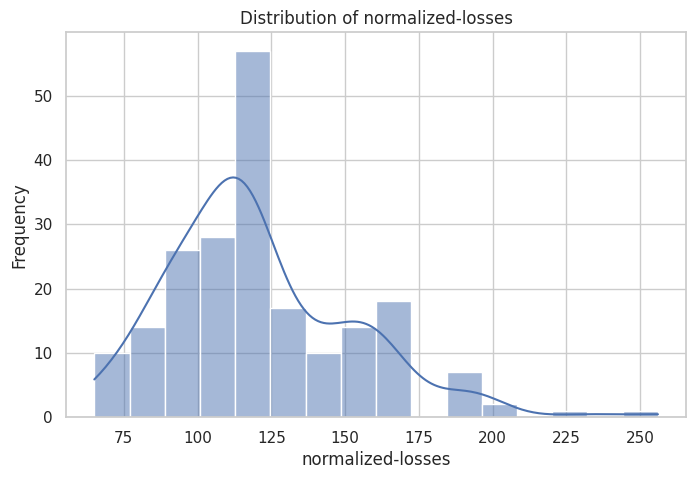

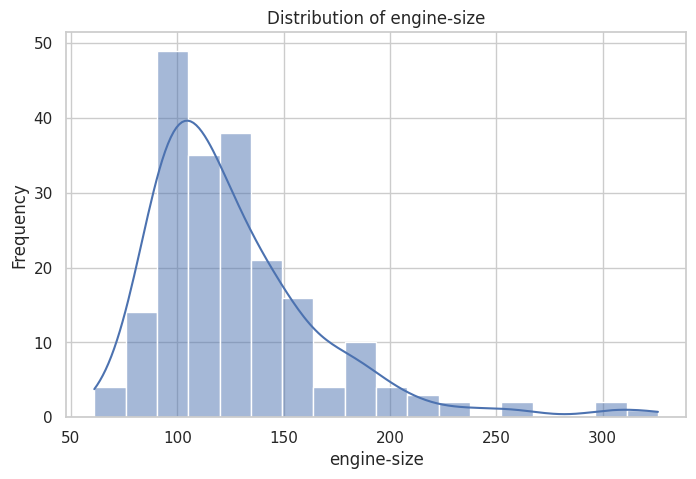

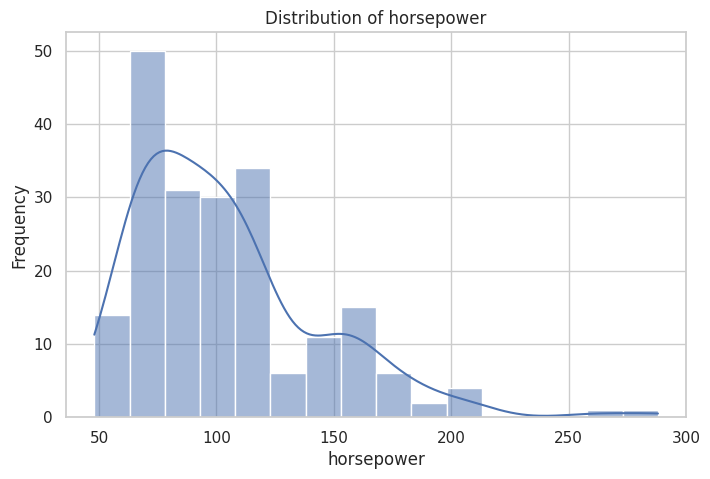

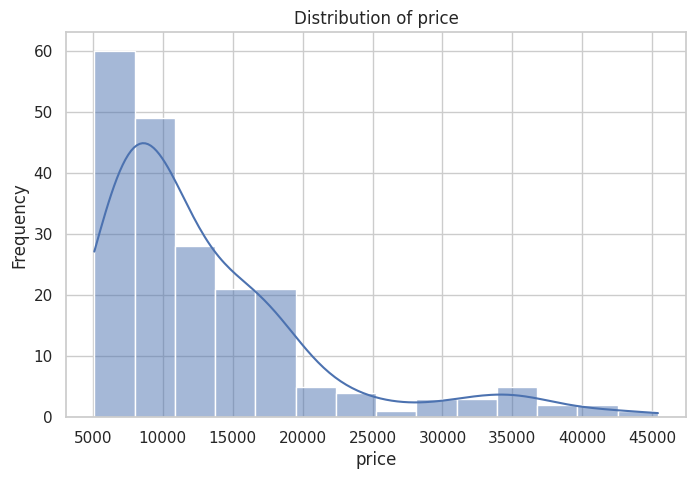

In [13]:
#Univariate Analysis
#1. Numerical Columns
# Plot histograms for numerical columns
numerical_cols = ['normalized-losses', 'engine-size', 'horsepower', 'price']
for col in numerical_cols:
    if col in df.columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

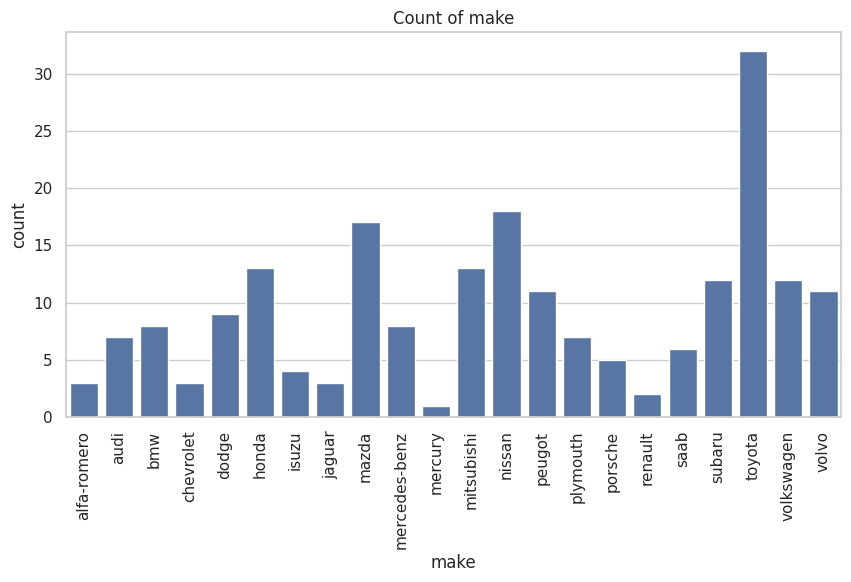

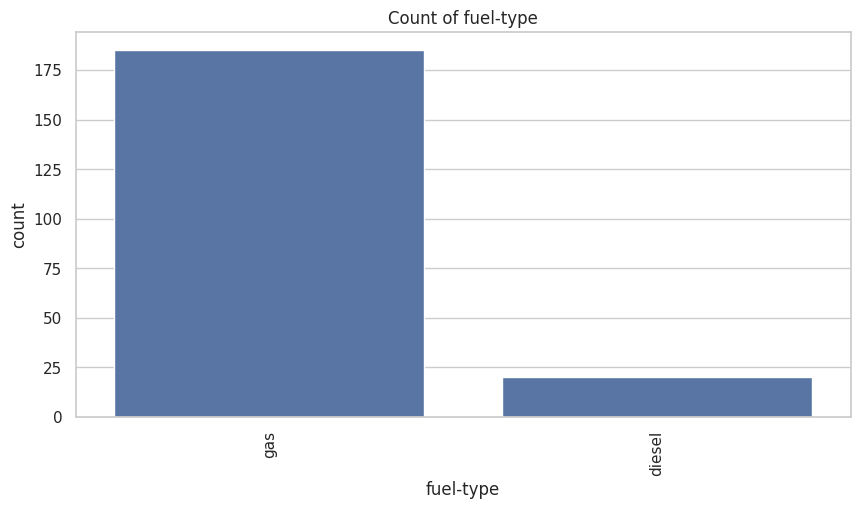

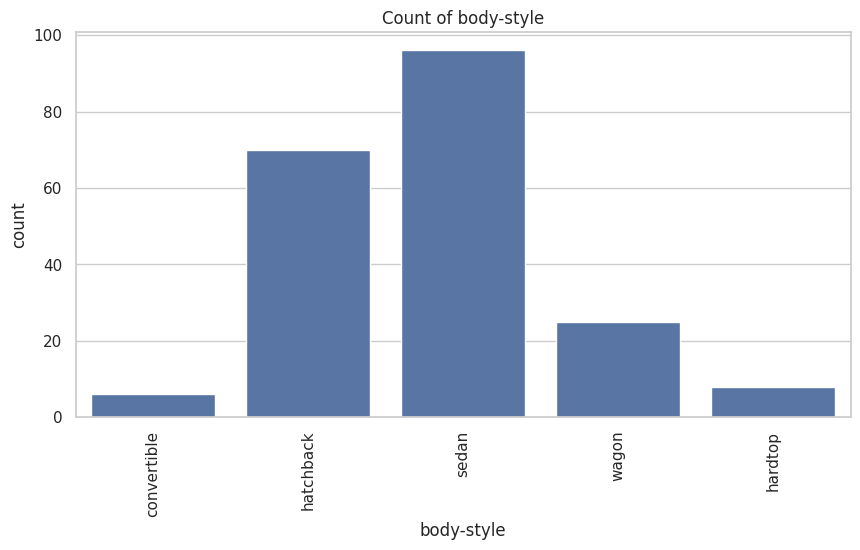

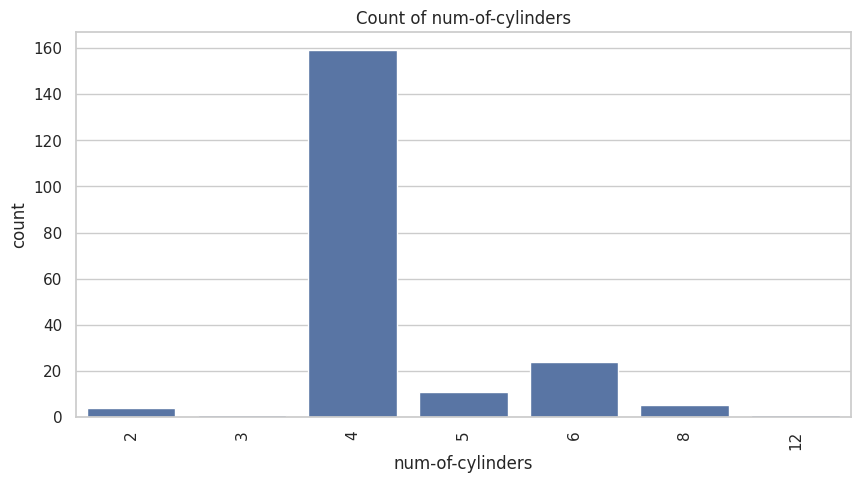

In [15]:
#Categorical Columns
# Plot bar plots for categorical columns
categorical_cols = ['make', 'fuel-type', 'body-style', 'num-of-cylinders']
for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df, x=col)
        plt.title(f'Count of {col}')
        plt.xticks(rotation=90)
        plt.show()

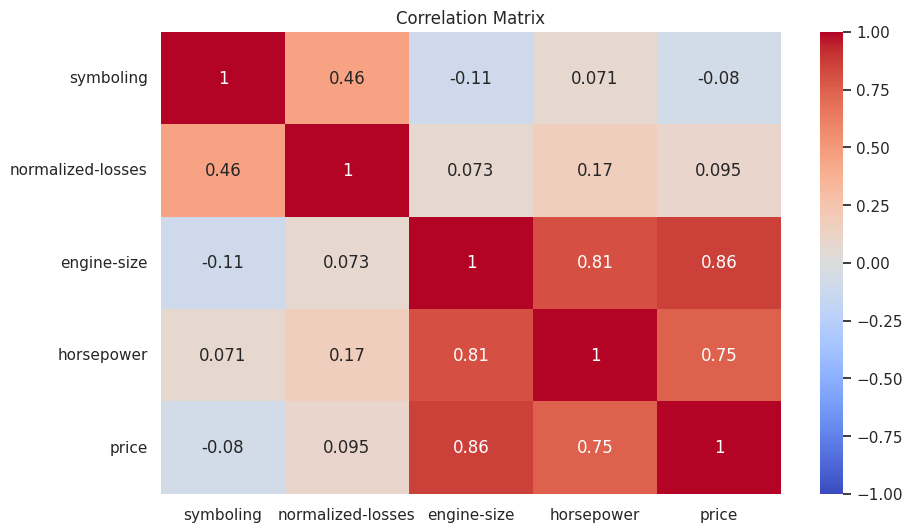

In [17]:
#Bivariate Analysis
#Correlation Matrix (for numerical variables)
# Compute correlation matrix
numerical_cols = ['symboling', 'normalized-losses', 'engine-size', 'horsepower', 'price']
corr_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

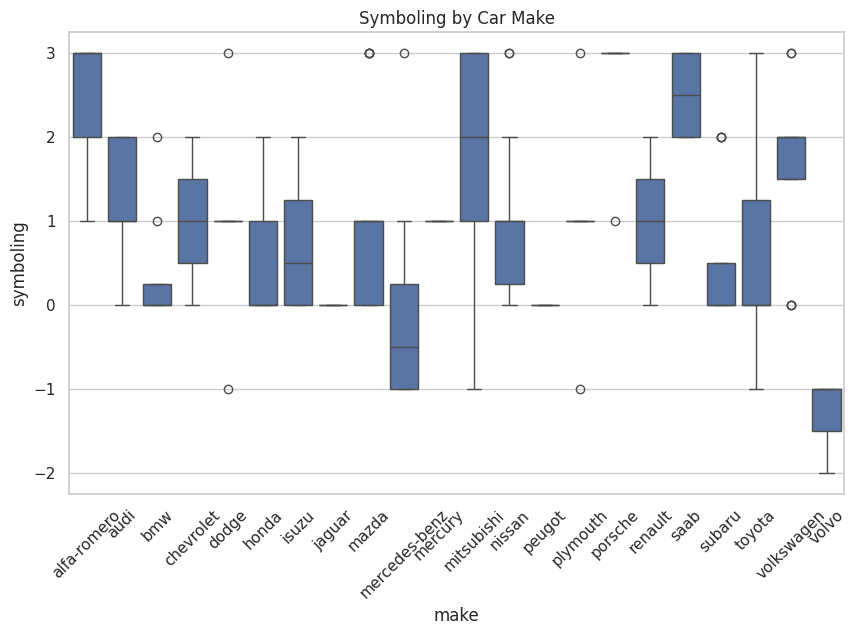

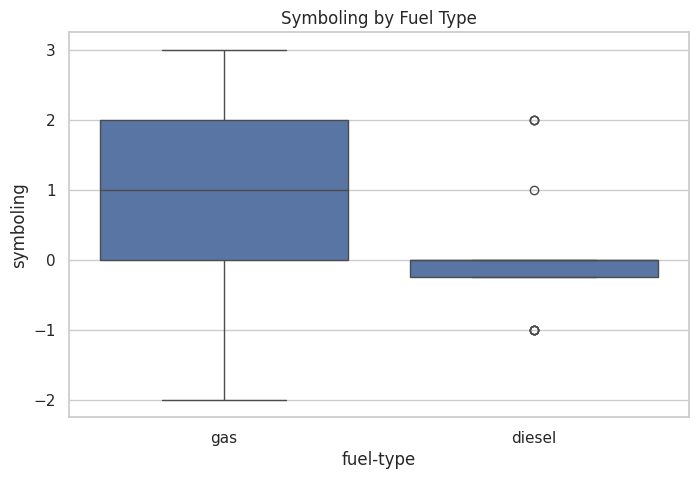

In [19]:
#Symboling vs. Categorical Variables
# Boxplot of symboling by make
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='make', y='symboling')
plt.title('Symboling by Car Make')
plt.xticks(rotation=45)
plt.show()

# Boxplot of symboling by fuel-type
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='fuel-type', y='symboling')
plt.title('Symboling by Fuel Type')
plt.show()

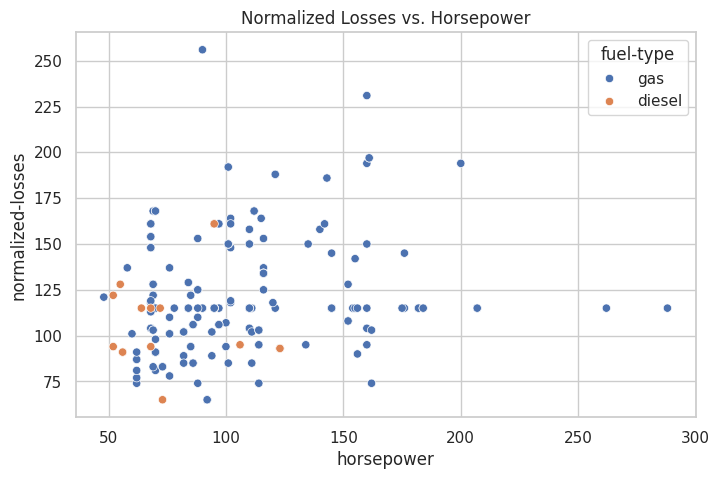

In [20]:
#Normalized Losses vs. Numerical Variables
# Scatter plot of normalized-losses vs. horsepower
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='horsepower', y='normalized-losses', hue='fuel-type')
plt.title('Normalized Losses vs. Horsepower')
plt.show()

In [21]:
# Identify outliers using IQR for numerical columns
for col in ['normalized-losses', 'horsepower', 'price']:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)][col]
        print(f"Outliers in {col}: {len(outliers)}")

Outliers in normalized-losses: 8
Outliers in horsepower: 6
Outliers in price: 14


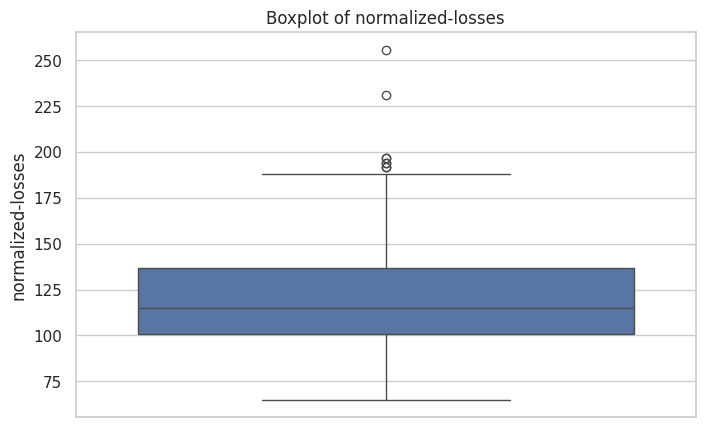

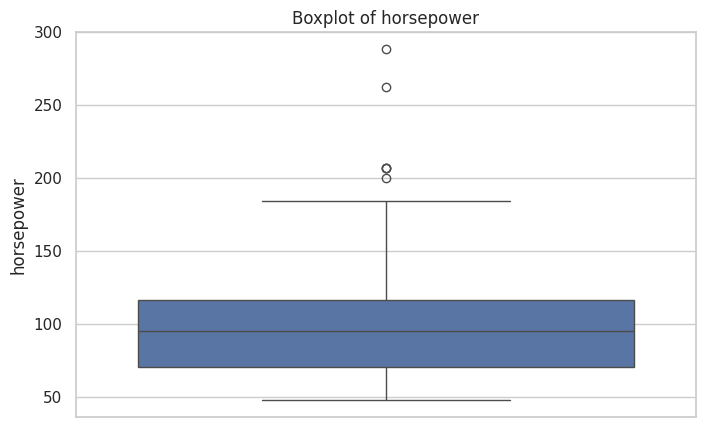

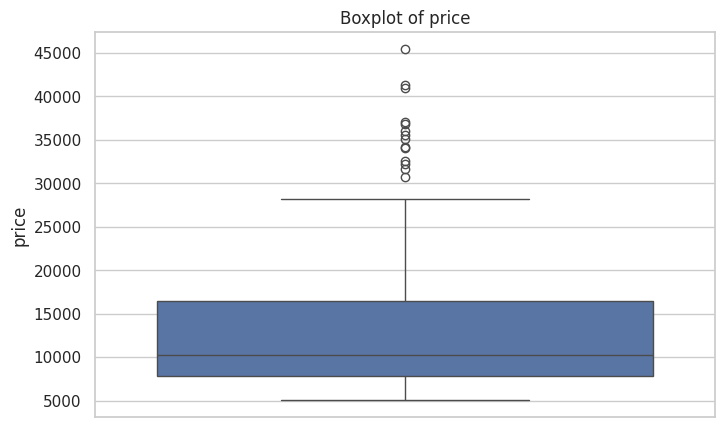

In [22]:
#Visualize Outliers
# Boxplots for columns with outliers
for col in ['normalized-losses', 'horsepower', 'price']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

In [23]:
df.to_csv("/content/automobile_dataset.csv", index=False)
print("Cleaned dataset saved as '/content/automobile_dataset.csv'")

Cleaned dataset saved as '/content/automobile_dataset.csv'
